In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from os.path import isfile
warnings.filterwarnings("ignore")

import scienceplots
plt.style.use('science')

# FONTS
import sys
from os.path import abspath
source_path = abspath('..')
if not source_path in sys.path:
    sys.path.append(source_path)
from font import SETTINGS
for key in SETTINGS:
    plt.rc(key, **SETTINGS[key])

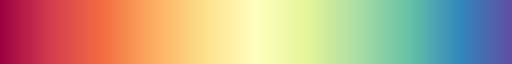

In [2]:
_cmap = plt.get_cmap('Spectral')
_cmap

In [3]:
cmap = _cmap(np.linspace(1, 0, 10)) # start with blue, end with red
len(cmap)

10

In [4]:
COLOR = plt.rcParams['axes.prop_cycle']
COLOR = [v for elem in list(COLOR) for _, v in elem.items()]
COLOR

['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e']

In [5]:
FIGURE_FORMAT = 'pdf'
# FIGURE_FORMAT = 'png'

In [6]:
PREFIX = 'wor'

# 0. Load & Preprocess CSV

In [7]:
csv_path = '../loss_overview_all.csv'
assert isfile(csv_path)

In [8]:
df = pd.read_csv(csv_path)
df.head()

,name,test_loss (~),test_loss,test_perplexity,lm-eval-avg-acc,lm-eval-avg-acc-std,-,-.1,-.2,-.3,...,O.Smax,O.Smin/Smax,O.logits_mean_mean,O.logits_mean_std,O.logits_std_mean,O.logits_std_std,O.logits_mean_absmean,O.logits_mean_absmax,H.mean_logsqZ,time
0,wor40A-16M-13p1B-100k-bs64-lr10-baseline-g0e+0...,3.881,3.881,48.461,NaN,NaN,-,-,-,-,...,522.03,0.36%,-1.3906,2.8594,8.4375,0.2871,7.0000,20.875,328.0,4879.6
1,wor40A-16M-13p1B-100k-bs64-lr100-baseline-g0e+...,3.841,3.841,46.556,NaN,NaN,-,-,-,-,...,4761.38,0.13%,16.5000,3.5312,22.2500,0.5352,23.3750,40.500,1720.0,4872.2
2,wor40A-16M-13p1B-100k-bs64-lr1000-baseline-g0e...,4.269,4.269,71.421,NaN,NaN,-,-,-,-,...,42230.91,0.12%,588.0000,4.6875,139.0000,0.9297,588.0000,604.000,389120.0,4869.3
3,wor40A-16M-13p1B-100k-bs64-lr3-baseline-g0e+00-s1,3.961,3.961,52.487,NaN,NaN,-,-,-,-,...,338.57,0.54%,-6.1562,2.6094,6.1250,0.2178,7.7188,19.250,156.0,4877.4
4,wor40A-16M-13p1B-100k-bs64-lr30-baseline-g0e+0...,3.850,3.850,46.982,NaN,NaN,-,-,-,-,...,1359.49,0.20%,3.8438,3.0938,11.3125,0.3418,9.6875,25.125,600.0,4872.5


In [9]:
df.columns

Index(['name', 'test_loss (~)', 'test_loss', 'test_perplexity',
       'lm-eval-avg-acc', 'lm-eval-avg-acc-std', '-', '-.1', '-.2', '-.3',
       '-.4', 'I.isotropy', 'I.max norm', 'I.avg norm', 'I.min norm',
       'I.mu norm', 'I.ratio norm', 'I.fhs_cos_sim', 'I.fhs_dot_prod',
       'I.eb_cos_sim', '-.5', 'O.isotropy', 'O.max norm', 'O.avg norm',
       'O.min norm', 'O.mu norm', 'O.ratio norm', 'O.fhs_cos_sim',
       'O.fhs_dot_prod', 'O.eb_cos_sim', 'O.eb_dot_sim', 'O.corr_p(norm, lbp)',
       'O.corr_s(norm, lbp)', 'O.corr_p(Emu, lbp)', 'O.corr_s(Emu, lbp)',
       'O.Smin', 'O.Smax', 'O.Smin/Smax', 'O.logits_mean_mean',
       'O.logits_mean_std', 'O.logits_std_mean', 'O.logits_std_std',
       'O.logits_mean_absmean', 'O.logits_mean_absmax', 'H.mean_logsqZ',
       'time'],
      dtype='object')

In [10]:
DROPPED_COLUMNS = [
    'test_loss (~)',
    'test_perplexity',
    '-', '-.1', '-.2', '-.3', '-.4', '-.5',
]
df = df.drop(columns=DROPPED_COLUMNS)
df = df[df['name'].str.contains(PREFIX)]
df.head()

,name,test_loss,lm-eval-avg-acc,lm-eval-avg-acc-std,I.isotropy,I.max norm,I.avg norm,I.min norm,I.mu norm,I.ratio norm,...,O.Smax,O.Smin/Smax,O.logits_mean_mean,O.logits_mean_std,O.logits_std_mean,O.logits_std_std,O.logits_mean_absmean,O.logits_mean_absmax,H.mean_logsqZ,time
0,wor40A-16M-13p1B-100k-bs64-lr10-baseline-g0e+0...,3.881,NaN,NaN,0.887,3.486,2.836,0.891,0.146,0.051,...,522.03,0.36%,-1.3906,2.8594,8.4375,0.2871,7.0000,20.875,328.0,4879.6
1,wor40A-16M-13p1B-100k-bs64-lr100-baseline-g0e+...,3.841,NaN,NaN,0.010,33.991,26.120,0.891,2.546,0.097,...,4761.38,0.13%,16.5000,3.5312,22.2500,0.5352,23.3750,40.500,1720.0,4872.2
2,wor40A-16M-13p1B-100k-bs64-lr1000-baseline-g0e...,4.269,NaN,NaN,0.000,371.815,213.487,0.891,31.882,0.149,...,42230.91,0.12%,588.0000,4.6875,139.0000,0.9297,588.0000,604.000,389120.0,4869.3
3,wor40A-16M-13p1B-100k-bs64-lr3-baseline-g0e+00-s1,3.961,NaN,NaN,0.959,1.597,1.288,0.826,0.049,0.038,...,338.57,0.54%,-6.1562,2.6094,6.1250,0.2178,7.7188,19.250,156.0,4877.4
4,wor40A-16M-13p1B-100k-bs64-lr30-baseline-g0e+0...,3.850,NaN,NaN,0.651,10.177,7.953,0.891,0.417,0.052,...,1359.49,0.20%,3.8438,3.0938,11.3125,0.3418,9.6875,25.125,600.0,4872.5


In [11]:
def get_lambda(x) -> float:
    if 'baseline' in x:
        return 0.
    else:
        part = x.split('-g')[-1].split('-s')[0]
        _lambda_factor = part[0]
        _lambda_exponent_sign = 1 if part[2] == '+' else -1
        _lambda_exponent = part[-1]
        try:
            _lambda_factor = float(_lambda_factor)
        except:
            raise Exception(f'ERROR! could not cast _lambda_factor = {_lambda_factor} to float for x = {x}')
        try:
            _lambda_exponent = float(_lambda_exponent)
        except:
            raise Exception(f'ERROR! could not cast _lambda_exponent = {_lambda_exponent} to float for x = {x}')
        _lambda = _lambda_factor * 10**(_lambda_exponent_sign * _lambda_exponent)
    
        return _lambda

def get_lr(x) -> float:
    _lr = x.split('-lr')[-1].split('-')[0]
    return _lr

def get_wt(x) -> str:
    return str(int("wt-" in x))

df['O.kappainv'] = df['O.Smin/Smax'].apply(lambda x: float(x[:-1]))
df['N'] = df['name'].apply(lambda x: x[3])
df['D'] = df['name'].apply(lambda x: x[4])
df['wt'] = df['name'].apply(lambda x: get_wt(x))
df['variant'] = df['name'].apply(lambda x: x[5])
df['lambda'] = df['name'].apply(lambda x: get_lambda(x))
df = df[df['variant'] != 'I']
df['lr'] = df['name'].apply(lambda x: get_lr(x))
df.head()

,name,test_loss,lm-eval-avg-acc,lm-eval-avg-acc-std,I.isotropy,I.max norm,I.avg norm,I.min norm,I.mu norm,I.ratio norm,...,O.logits_mean_absmax,H.mean_logsqZ,time,O.kappainv,N,D,wt,variant,lambda,lr
0,wor40A-16M-13p1B-100k-bs64-lr10-baseline-g0e+0...,3.881,NaN,NaN,0.887,3.486,2.836,0.891,0.146,0.051,...,20.875,328.0,4879.6,0.36,4,0,0,A,0.0,10
1,wor40A-16M-13p1B-100k-bs64-lr100-baseline-g0e+...,3.841,NaN,NaN,0.010,33.991,26.120,0.891,2.546,0.097,...,40.500,1720.0,4872.2,0.13,4,0,0,A,0.0,100
2,wor40A-16M-13p1B-100k-bs64-lr1000-baseline-g0e...,4.269,NaN,NaN,0.000,371.815,213.487,0.891,31.882,0.149,...,604.000,389120.0,4869.3,0.12,4,0,0,A,0.0,1000
3,wor40A-16M-13p1B-100k-bs64-lr3-baseline-g0e+00-s1,3.961,NaN,NaN,0.959,1.597,1.288,0.826,0.049,0.038,...,19.250,156.0,4877.4,0.54,4,0,0,A,0.0,3
4,wor40A-16M-13p1B-100k-bs64-lr30-baseline-g0e+0...,3.850,NaN,NaN,0.651,10.177,7.953,0.891,0.417,0.052,...,25.125,600.0,4872.5,0.20,4,0,0,A,0.0,30


# 1. Analyze (Dependency on lambda)

In [12]:
# PARAMETERS
LRs = ['3', '10', '30', '100', '300', '1000', '3000']

CLR = {
    'A': COLOR[3],
    'E': COLOR[2],
    'I': COLOR[4],
    'R': COLOR[1],
    'Z': COLOR[0],
}

LABEL = {
    'A': 'baseline',
    'E': r'$\mu$-loss',
    'R': r'$\mu$-centering',
    'Z': 'z-loss',
}

def get_label(variant, _lambda):
    label = LABEL[variant]
    if variant in ['E', 'I', 'Z']:
        label = f'{label} ({_lambda:.0e})'.replace("-0", "-").replace("+0", "+")
    return label

MARKER = {
    '4': 's',
    '6': 'd',
    '8': 'o',
    'A': 'P',
    'C': 'X',
}

LINESTYLE = {
    '4': ':',
    '6': '--',
    '8': '-.',
    'A': '-',
    'C': '-',
}

ALPHA = {
    1e-7: 0.25,
    0.0001: 0.5,
    0.1: 0.75,
    100.0: 1.00,
}

PLOT_VARIANTS = ['E', 'Z']

In [13]:
def _format(elem, elem_number):
    if elem_number in [0]:
        elem_str = f'{elem:.0e}'
        if 'e+0' in elem_str:
            return '$' + f'{elem_str[0]} \cdot 10^{elem_str[-1]}'.replace('^', '^{') + '}$'
        elif 'e-0' in elem_str:
            return '$' + f'{elem_str[0]} \cdot 10^-{elem_str[-1]}'.replace('^', '^{') + '}$'
    elif elem_number in [5]:
        return f'{elem:.1f}' 
    else:
        return f'{elem:.2f}'

def get_results_table(n, d, wt='0', lr='3', save_as=''):
    QUANTITIES = [
        'test_loss', 
        'O.isotropy',
        'O.mu norm',
        'O.max norm',
        'O.avg norm',
        'O.min norm',
        'O.ratio norm',
        'O.eb_cos_sim',
        'O.corr_p(Emu, lbp)',
        'O.kappainv',
        'O.logits_mean_mean',
        'O.logits_mean_std',
        'O.logits_mean_absmean',
        'O.logits_mean_absmax',
        'H.mean_logsqZ',
        'time',
    ]
    _df_filter = df[df['N'] == n][df['D'] == d][df['wt'] == wt][df['lr'] == lr]

    # filter!
    _df_filter = _df_filter[
        (_df_filter['variant'] == 'A') | 
        (_df_filter['variant'] == 'E') | 
        (_df_filter['variant'] == 'R') | 
        (_df_filter['variant'] == 'Z')
    ]

    _df_filter = _df_filter.sort_values(by=['variant', 'lambda'])
    _variant = [elem for elem in list(_df_filter['variant'].values)]
    _lambda = [float(elem) for elem in list(_df_filter['lambda'].values)]
    _quantity = {quantity: [float(elem) for elem in list(_df_filter[quantity].values)] for quantity in QUANTITIES}
    data = {
        'variant': _variant,
        'lambda': _lambda,
    }
    data = data | _quantity

    if len(save_as):
        assert save_as.endswith('.tex')
        tex_path = f'tables/{save_as}'
        
        rows = []
        for row_number in range(len(data['lambda'])):
            row = []
            for k, v in data.items():
                row.append(v[row_number])
            rows.append(row)
            
        with open(tex_path, 'w') as f:
            for i, row in enumerate(rows):
                f.write(f' & '.join([row[0]] + [_format(elem, elem_number) for elem_number, elem in enumerate(row[1:])]))
                if i < len(rows) - 1:
                    f.write(' \\\\ \n')
                
        print(f'> saved as {tex_path}')
    return data

In [14]:
results = {scale: {} for scale in ['4', '6', '8', 'A', 'C']}
for scale in results:
    for lr in LRs:
        results[scale][lr] = get_results_table(scale, '0', lr=lr)

# 2. Plot (Dependency on lr)

In [15]:
# PARAMETERS
NS = ['4', '6', '8', 'A', 'C']
NS_SINGLE = ['C']
VARIANTS = ['A', 'Z', 'E', 'R']

VARIANTS_LAMBDAS = {
    'A': [0.0],
    'Z': [0.0001],
    'E': [0.0001],
    'R': [0.0],
}

In [16]:
# results

In [17]:
def extract_curves(_results, quantity):
    """
    Input:
        e.g. results[N][lr] = {
            'variant': ['A', 'E', 'E', ..]
            'lambda': [0, 1e-7, 1e-4, ..]
            'test_loss': [loss_A_lambda0, loss_E_lambda1e-7, loss_E_lambda1e-4, ..]
            '..',
        }

    Output:
        lrs = [3, 10, ..]
        e.g. loss[N]['A'|'E'|'R'|'Z'][lambda] = [loss_3, loss_10, ..]
    """
    lrs = None
    q = {n: {variant: {} for variant in VARIANTS} for n in results}
    for n in results:
        if lrs is None:
            lrs = list(results[n].keys())
        for j, lr in enumerate(lrs):
            d = _results[n][lr]
            for _, (elem_variant, elem_lambda, elem_quantity) in enumerate(zip(d['variant'], d['lambda'], d[quantity])):
                if j == 0:
                    q[n][elem_variant][elem_lambda] = [elem_quantity]
                else:
                    q[n][elem_variant][elem_lambda].append(elem_quantity)
                
    lrs = [int(lr) / 10000 for lr in lrs]
    return lrs, q

In [18]:
lrs, loss = extract_curves(results, 'test_loss')
lrs, loss

([0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3],
 {'4': {'A': {0.0: [3.961, 3.881, 3.85, 3.841, 3.857, 4.269, 5.065]},
   'Z': {1e-07: [3.961, 3.881, 3.85, 3.844, 3.866, 3.858, 3.871],
    0.0001: [3.961, 3.878, 3.848, 3.836, 3.841, 3.854, 3.955],
    0.1: [3.936, 3.856, 3.844, 3.835, 3.849, 3.847, 3.871],
    100.0: [4.267, 4.188, 4.245, 4.6, 4.942, 6.358, 7.652]},
   'E': {1e-07: [3.961, 3.881, 3.85, 3.84, 3.863, 3.977, 4.597],
    0.0001: [3.961, 3.881, 3.849, 3.839, 3.843, 3.839, 3.845],
    0.1: [3.961, 3.881, 3.848, 3.838, 3.838, 3.837, 3.845],
    100.0: [3.964, 3.883, 3.85, 3.839, 3.836, 3.811, 3.816]},
   'R': {0.0: [3.962, 3.881, 3.85, 3.842, 3.843, 3.844, 3.842]}},
  '6': {'A': {0.0: [3.688, 3.614, 3.591, 3.592, 3.596, 4.298, 5.107]},
   'Z': {1e-07: [3.688, 3.613, 3.588, 3.59, 3.587, 3.663, 3.644],
    0.0001: [3.687, 3.613, 3.585, 3.586, 3.58, 3.599, 3.606],
    0.1: [3.663, 3.6, 3.575, 3.574, 3.581, 3.591, 3.69],
    100.0: [4.022, 3.937, 4.041, 4.142, 4.745, 6.539, 10.812]

In [19]:
_, logits_mean_mean = extract_curves(results, 'O.logits_mean_mean')
logits_mean_mean

{'4': {'A': {0.0: [-6.1562, -1.3906, 3.8438, 16.5, 92.5, 588.0, 1152.0]},
  'Z': {1e-07: [-6.2188, -1.1641, -1.875, 17.125, 105.5, 47.75, 113.5],
   0.0001: [-13.3125, -14.3125, -15.0, -15.6875, -16.75, -18.875, -17.875],
   0.1: [-17.125, -17.625, -18.0, -18.5, -19.125, -18.75, -18.0],
   100.0: [-16.875, -17.875, -18.25, -17.875, -17.25, -15.0, -13.0]},
  'E': {1e-07: [-6.1562, -1.6094, -0.5078, 5.4688, 96.5, 310.0, 760.0],
   0.0001: [-6.1562, -2.0156, 1.2188, 1.2266, 24.375, -10.5625, -1.5703],
   0.1: [-4.75, -2.9844, -4.125, -1.3047, -0.457, -0.2539, -0.0198],
   100.0: [-0.0481, -0.0806, -0.0237, -0.0126, -0.0005, -0.0002, -0.0]},
  'R': {0.0: [0.0, 0.0, 0.0002, 0.0003, 0.0005, -0.0001, 0.0002]}},
 '6': {'A': {0.0: [-4.1875, -1.1172, 6.375, 17.375, 89.5, 892.0, 1352.0]},
  'Z': {1e-07: [-4.4375, -1.8047, 4.0625, 31.0, 27.0, 203.0, 167.0],
   0.0001: [-13.3125, -14.0625, -14.875, -15.875, -15.9375, -18.5, -17.125],
   0.1: [-17.375, -17.875, -18.375, -18.75, -19.25, -18.875, -18.

In [20]:
_, logits_mean_std = extract_curves(results, 'O.logits_mean_std')
logits_mean_std

{'4': {'A': {0.0: [2.6094, 2.8594, 3.0938, 3.5312, 4.125, 4.6875, 5.5625]},
  'Z': {1e-07: [2.5781, 2.7812, 3.2969, 3.3281, 3.7969, 3.8906, 3.7656],
   0.0001: [2.9688, 3.0938, 3.625, 3.6562, 3.9375, 4.8438, 4.0938],
   0.1: [3.0625, 3.5312, 3.6719, 4.1562, 4.25, 4.0, 3.3906],
   100.0: [3.1719, 3.9062, 4.4688, 4.8125, 4.0, 3.5469, 2.7812]},
  'E': {1e-07: [2.5781, 2.8438, 3.0938, 3.4531, 3.8281, 5.5625, 19.5],
   0.0001: [2.5625, 2.7812, 3.0469, 3.1562, 3.4375, 3.0312, 2.9531],
   0.1: [2.4531, 2.625, 2.9219, 2.7969, 3.1562, 3.0938, 3.0312],
   100.0: [2.2031, 2.2812, 2.4375, 2.7656, 2.9531, 2.9531, 3.1719]},
  'R': {0.0: [2.5938, 2.8125, 3.1875, 3.5156, 3.6875, 3.9844, 3.4062]}},
 '6': {'A': {0.0: [2.4844, 2.8594, 2.9688, 3.4219, 3.7969, 6.75, 5.4688]},
  'Z': {1e-07: [2.5, 2.875, 3.1094, 3.4062, 3.6406, 4.0625, 3.6719],
   0.0001: [2.9375, 3.1875, 3.7031, 3.875, 3.7812, 3.8906, 3.1875],
   0.1: [3.0781, 3.4219, 3.7969, 3.9219, 4.5625, 3.8906, 3.4688],
   100.0: [3.125, 3.9844, 4.562

In [21]:
_, logits_mean_absmean = extract_curves(results, 'O.logits_mean_absmean')
logits_mean_absmean

{'4': {'A': {0.0: [7.7188, 7.0, 9.6875, 23.375, 92.5, 588.0, 1152.0]},
  'Z': {1e-07: [7.7812, 7.2188, 9.875, 22.875, 107.0, 52.25, 114.0],
   0.0001: [13.3125, 14.3125, 15.0, 15.6875, 16.75, 18.875, 17.875],
   0.1: [17.125, 17.625, 18.0, 18.5, 19.125, 18.75, 18.0],
   100.0: [16.875, 17.875, 18.25, 17.875, 17.25, 15.0, 13.0]},
  'E': {1e-07: [7.75, 7.2812, 10.3125, 10.5, 97.0, 310.0, 760.0],
   0.0001: [7.75, 6.8438, 8.9375, 9.5625, 28.625, 18.125, 7.5938],
   0.1: [5.7188, 5.7812, 4.8438, 2.6875, 2.4375, 2.3906, 2.3125],
   100.0: [1.6484, 1.7344, 1.8438, 2.125, 2.25, 2.2812, 2.4688]},
  'R': {0.0: [2.0156, 2.2031, 2.5, 2.7344, 2.875, 3.1094, 2.6562]}},
 '6': {'A': {0.0: [6.3438, 4.6875, 11.3125, 18.625, 89.5, 892.0, 1352.0]},
  'Z': {1e-07: [6.5312, 5.1875, 13.25, 31.25, 28.25, 204.0, 167.0],
   0.0001: [13.375, 14.0625, 14.875, 15.875, 16.0, 18.5, 17.125],
   0.1: [17.375, 17.875, 18.375, 18.75, 19.25, 18.875, 18.375],
   100.0: [17.125, 18.125, 18.5, 18.125, 17.625, 14.8125, 0.0]

In [22]:
_, logits_mean_absmax = extract_curves(results, 'O.logits_mean_absmax')
logits_mean_absmax

{'4': {'A': {0.0: [19.25, 20.875, 25.125, 40.5, 110.5, 604.0, 1176.0]},
  'Z': {1e-07: [19.125, 20.75, 26.0, 39.0, 124.5, 70.0, 132.0],
   0.0001: [26.875, 29.125, 33.5, 34.25, 37.25, 46.25, 38.75],
   0.1: [31.5, 35.0, 38.25, 42.0, 41.25, 43.0, 35.5],
   100.0: [30.0, 36.5, 51.75, 68.0, 48.25, 46.5, 66.5]},
  'E': {1e-07: [19.125, 21.125, 25.75, 27.25, 114.0, 330.0, 780.0],
   0.0001: [19.125, 20.375, 24.125, 25.875, 45.25, 34.0, 24.125],
   0.1: [17.125, 18.75, 20.375, 17.25, 19.625, 19.125, 18.625],
   100.0: [14.6875, 14.9375, 15.6875, 16.75, 18.25, 17.25, 17.25]},
  'R': {0.0: [15.375, 15.75, 17.0, 20.0, 19.0, 21.75, 17.875]}},
 '6': {'A': {0.0: [17.75, 18.875, 26.875, 35.5, 107.5, 912.0, 1376.0]},
  'Z': {1e-07: [18.0, 19.125, 28.5, 48.25, 45.75, 222.0, 185.0],
   0.0001: [27.0, 30.375, 34.75, 37.5, 35.5, 41.5, 32.0],
   0.1: [32.25, 35.75, 40.0, 42.0, 48.75, 42.0, 35.75],
   100.0: [30.0, 36.75, 55.0, 57.0, 60.0, 47.25, 0.0]},
  'E': {1e-07: [18.0, 19.375, 33.0, 49.0, 95.5, 219.

In [23]:
_, mu_norm = extract_curves(results, 'O.mu norm')
mu_norm

{'4': {'A': {0.0: [1.435, 2.212, 5.806, 20.212, 56.652, 187.225, 331.471]},
  'Z': {1e-07: [1.438, 2.23, 5.726, 18.917, 59.528, 139.902, 367.327],
   0.0001: [1.647, 2.967, 7.04, 24.368, 78.836, 272.04, 841.05],
   0.1: [3.005, 4.255, 8.489, 23.797, 91.647, 318.641, 831.115],
   100.0: [2.482, 3.203, 4.924, 12.583, 17.655, 19.131, 90.263]},
  'E': {1e-07: [1.438, 2.206, 5.889, 18.999, 55.528, 131.945, 322.228],
   0.0001: [1.43, 2.213, 5.562, 12.478, 17.828, 19.245, 8.28],
   0.1: [0.435, 0.43, 0.363, 0.286, 0.159, 0.124, 0.043],
   100.0: [0.002, 0.002, 0.001, 0.001, 0.0, 0.0, 0.0]},
  'R': {0.0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}},
 '6': {'A': {0.0: [1.331, 2.137, 5.885, 19.942, 63.188, 192.094, 321.511]},
  'Z': {1e-07: [1.329, 2.152, 5.541, 19.036, 66.913, 178.631, 334.872],
   0.0001: [1.789, 3.663, 8.267, 27.157, 78.424, 246.578, 1003.867],
   0.1: [2.917, 4.1, 10.418, 30.662, 123.322, 404.08, 871.983],
   100.0: [2.252, 2.962, 4.853, 15.558, 14.371, 22.392, 127.316]},
  'E': {

In [24]:
_, max_norm = extract_curves(results, 'O.max norm')
max_norm

{'4': {'A': {0.0: [2.96, 4.758, 12.475, 48.689, 105.647, 290.653, 664.776]},
  'Z': {1e-07: [2.976, 4.751, 13.689, 42.888, 110.171, 310.98, 738.935],
   0.0001: [3.064, 5.662, 14.964, 45.146, 144.809, 446.828, 1217.672],
   0.1: [4.216, 7.765, 15.001, 45.256, 145.26, 495.904, 1216.473],
   100.0: [4.216, 7.991, 17.635, 48.261, 103.91, 122.635, 487.852]},
  'E': {1e-07: [2.97, 4.794, 12.817, 41.964, 104.014, 261.792, 627.196],
   0.0001: [2.997, 5.005, 11.74, 36.315, 178.954, 460.828, 229.024],
   0.1: [16.686, 22.56, 41.247, 33.868, 76.481, 298.341, 245.394],
   100.0: [1.315, 6.035, 13.829, 22.986, 41.491, 57.428, 62.539]},
  'R': {0.0: [2.988, 4.17, 10.76, 27.298, 74.391, 182.792, 522.906]}},
 '6': {'A': {0.0: [2.732, 5.083, 11.889, 44.252, 126.587, 311.344, 679.004]},
  'Z': {1e-07: [2.754, 5.552, 12.69, 40.793, 130.974, 345.691, 730.299],
   0.0001: [3.172, 7.119, 16.786, 57.5, 161.42, 422.916, 1404.026],
   0.1: [4.277, 7.429, 20.618, 52.856, 189.068, 583.011, 1244.161],
   100.0:

In [25]:
_, avg_norm = extract_curves(results, 'O.avg norm')
avg_norm

{'4': {'A': {0.0: [1.546, 2.435, 6.334, 22.167, 60.572, 200.094, 372.937]},
  'Z': {1e-07: [1.548, 2.448, 6.38, 20.502, 63.352, 155.157, 409.817],
   0.0001: [1.746, 3.094, 7.767, 26.094, 82.057, 277.878, 851.008],
   0.1: [3.058, 4.468, 8.889, 25.582, 95.217, 324.544, 862.476],
   100.0: [2.918, 4.333, 9.686, 26.279, 38.385, 36.217, 131.148]},
  'E': {1e-07: [1.549, 2.425, 6.38, 20.958, 59.827, 150.377, 359.672],
   0.0001: [1.541, 2.437, 5.982, 15.545, 31.115, 72.103, 84.97],
   0.1: [1.216, 1.792, 2.987, 7.456, 19.356, 63.535, 86.708],
   100.0: [0.406, 0.915, 2.287, 8.645, 13.768, 21.549, 25.677]},
  'R': {0.0: [0.677, 1.173, 3.074, 8.467, 26.04, 63.898, 168.351]}},
 '6': {'A': {0.0: [1.491, 2.561, 6.698, 22.442, 71.594, 213.186, 386.949]},
  'Z': {1e-07: [1.49, 2.558, 6.477, 22.047, 71.338, 200.233, 402.035],
   0.0001: [1.905, 3.885, 9.078, 29.795, 89.086, 260.329, 1023.925],
   0.1: [2.991, 4.403, 11.035, 33.019, 127.567, 414.361, 923.187],
   100.0: [2.715, 4.484, 11.431, 32.94

In [26]:
_, min_norm = extract_curves(results, 'O.min norm')
min_norm

{'4': {'A': {0.0: [0.487, 0.901, 2.196, 6.045, 27.099, 165.417, 242.693]},
  'Z': {1e-07: [0.491, 0.913, 2.585, 8.5, 29.259, 75.899, 267.918],
   0.0001: [0.6, 1.021, 2.964, 8.886, 27.775, 167.071, 481.307],
   0.1: [1.246, 2.001, 4.32, 12.522, 44.327, 127.953, 370.054],
   100.0: [1.407, 1.845, 2.46, 3.543, 8.008, 7.028, 15.447]},
  'E': {1e-07: [0.494, 0.938, 2.511, 6.682, 29.199, 102.428, 258.667],
   0.0001: [0.49, 0.914, 2.334, 6.861, 15.621, 23.957, 37.047],
   0.1: [0.415, 0.525, 0.875, 2.146, 7.217, 18.943, 36.036],
   100.0: [0.168, 0.239, 0.841, 2.988, 6.886, 8.696, 4.789]},
  'R': {0.0: [0.263, 0.398, 1.122, 3.041, 9.361, 19.952, 59.314]}},
 '6': {'A': {0.0: [0.531, 0.997, 2.683, 9.375, 37.34, 167.242, 289.364]},
  'Z': {1e-07: [0.533, 0.961, 2.869, 9.056, 28.877, 119.97, 250.678],
   0.0001: [0.715, 1.293, 3.711, 10.834, 36.689, 160.193, 713.836],
   0.1: [1.292, 2.0, 5.254, 15.891, 54.232, 167.17, 364.548],
   100.0: [1.362, 1.963, 2.314, 4.678, 4.534, 13.892, 19.847]},
  

In [27]:
_, cos_sim = extract_curves(results, 'O.eb_cos_sim')
cos_sim

{'4': {'A': {0.0: [5.2, 3.7, 11.7, 9.8, 2.0, 17.2, 6.6]},
  'Z': {1e-07: [5.0, 2.4, -0.2, -0.2, 15.4, 16.9, 10.3],
   0.0001: [10.2, 16.7, 5.7, 22.3, 18.2, 20.0, 27.4],
   0.1: [25.4, 14.5, 10.9, 23.4, 9.5, 28.7, 24.9],
   100.0: [40.1, 42.8, 46.5, 37.5, 30.9, 14.5, -5.5]},
  'E': {1e-07: [5.2, 2.2, 15.4, 9.3, 6.8, 12.8, 18.1],
   0.0001: [5.3, 6.0, 11.5, 21.1, 13.2, 12.6, 25.1],
   0.1: [15.9, 5.6, 15.5, 14.5, 13.8, 12.0, 14.1],
   100.0: [31.4, 22.5, 27.0, 7.5, 35.1, 48.2, 51.6]},
  'R': {0.0: [9.7, 10.2, 8.7, 13.6, 10.0, 15.6, 13.7]}},
 '6': {'A': {0.0: [6.9, 8.2, 9.9, 10.1, 17.0, 25.8, 17.6]},
  'Z': {1e-07: [6.7, 9.1, 10.3, 9.5, 20.3, 16.6, 12.0],
   0.0001: [11.4, 14.6, 17.1, 14.5, 24.9, 15.5, 25.1],
   0.1: [27.9, 23.1, 26.3, 16.5, 20.8, 23.8, 24.2],
   100.0: [43.2, 48.3, 49.3, 44.3, 36.0, 17.9, -8.3]},
  'E': {1e-07: [6.7, 10.8, 7.1, 14.2, 10.4, 16.0, 22.0],
   0.0001: [7.2, 10.1, 14.6, 21.5, 0.8, 26.8, 33.1],
   0.1: [8.6, 12.3, 25.3, 20.8, 21.9, 21.5, 23.6],
   100.0: [30.8,

In [28]:
_, isotropy = extract_curves(results, 'O.isotropy')
isotropy

{'4': {'A': {0.0: [0.206, 0.124, 0.003, 0.0, 0.0, 0.0, 0.0]},
  'Z': {1e-07: [0.212, 0.121, 0.003, 0.0, 0.0, 0.0, 0.0],
   0.0001: [0.201, 0.039, 0.0, 0.0, 0.0, 0.0, 0.0],
   0.1: [0.052, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0],
   100.0: [0.079, 0.023, 0.05, 0.0, 0.0, 0.0, 0.0]},
  'E': {1e-07: [0.212, 0.11, 0.001, 0.0, 0.0, 0.0, 0.0],
   0.0001: [0.216, 0.119, 0.009, 0.0, 0.0, 0.0, 0.0],
   0.1: [0.403, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
   100.0: [0.991, 0.185, 0.218, 0.0, 0.0, 0.0, 0.0]},
  'R': {0.0: [0.878, 0.662, 0.117, 0.0, 0.0, 0.0, 0.0]}},
 '6': {'A': {0.0: [0.286, 0.09, 0.013, 0.0, 0.0, 0.0, 0.0]},
  'Z': {1e-07: [0.269, 0.084, 0.021, 0.0, 0.0, 0.0, 0.0],
   0.0001: [0.173, 0.018, 0.0, 0.0, 0.0, 0.0, 0.0],
   0.1: [0.055, 0.014, 0.0, 0.0, 0.0, 0.0, 0.0],
   100.0: [0.1, 0.02, 0.082, 0.0, 0.0, 0.0, 0.0]},
  'E': {1e-07: [0.269, 0.093, 0.017, 0.0, 0.0, 0.0, 0.0],
   0.0001: [0.27, 0.098, 0.003, 0.0, 0.0, 0.0, 0.0],
   0.1: [0.0, 0.0, 0.226, 0.0, 0.0, 0.0, 0.0],
   100.0: [0.935, 0.838, 0.2

In [29]:
_, mean_logsqZ = extract_curves(results, 'H.mean_logsqZ')
mean_logsqZ

{'4': {'A': {0.0: [156.0, 328.0, 600.0, 1720.0, 13248.0, 389120.0, 1703936.0]},
  'Z': {1e-07: [767.2, 1021.8, 275.3, 111.2, 36.7, 34.1, 29.5],
   0.0001: [24.6, 17.0, 18.4, 15.2, 14.0, 14.8, 12.9],
   0.1: [594.6, 409.7, 314.3, 92.9, 30.8, 32.9, 29.3],
   100.0: [37.7, 39.5, 51.9, 37.1, 29.2, 29.3, 30.7]},
  'E': {1e-07: [766.9, 909.3, 274.8, 100.3, 34.9, 30.8, 32.3],
   0.0001: [783.1, 883.6, 518.8, 116.6, 45.5, 32.4, 29.6],
   0.1: [167.0, 244.0, 190.0, 270.0, 314.0, 324.0, 326.0],
   100.0: [1718.5, 987.9, 1605.3, 384.9, 37.5, 29.6, 29.2]},
  'R': {0.0: [284.0, 298.0, 318.0, 340.0, 360.0, 366.0, 360.0]}},
 '6': {'A': {0.0: [202.0, 298.0, 724.0, 1440.0, 12864.0, 864256.0, 2056192.0]},
  'Z': {1e-07: [1062.7, 834.3, 217.4, 140.4, 44.3, 38.7, 33.3],
   0.0001: [25.5, 22.1, 19.8, 15.4, 19.8, 11.4, 13.1],
   0.1: [706.6, 652.4, 227.8, 45.3, 34.0, 33.8, 33.3],
   100.0: [41.5, 44.7, 95.0, 42.6, 71.5, 33.3, 33.3]},
  'E': {1e-07: [1045.8, 941.9, 357.2, 132.7, 49.5, 34.2, 33.3],
   0.0001:

In [30]:
_, time = extract_curves(results, 'time')
time

{'4': {'A': {0.0: [4877.4, 4879.6, 4872.5, 4872.2, 4878.3, 4869.3, 4864.8]},
  'Z': {1e-07: [5196.6, 5196.0, 5186.1, 5178.3, 5183.6, 5197.3, 5192.1],
   0.0001: [5184.7, 5185.6, 5177.2, 5176.1, 5191.1, 5182.5, 5178.6],
   0.1: [5188.8, 5175.9, 5182.8, 5182.9, 5182.3, 5171.8, 5179.3],
   100.0: [5175.1, 5176.4, 5188.2, 5185.3, 5187.0, 5189.9, 5161.2]},
  'E': {1e-07: [4887.5, 4887.9, 4897.3, 4884.9, 4895.0, 4888.8, 4878.9],
   0.0001: [4887.6, 4883.2, 4889.6, 4882.8, 4888.9, 4901.9, 4901.4],
   0.1: [4882.9, 4888.3, 4905.0, 4891.5, 4904.7, 4905.8, 4900.1],
   100.0: [4896.5, 4893.0, 4889.3, 4888.3, 4894.9, 4893.4, 4889.7]},
  'R': {0.0: [4909.4, 4905.7, 4895.3, 4896.1, 4898.4, 4901.7, 4907.6]}},
 '6': {'A': {0.0: [7695.6, 7696.2, 7663.2, 7685.4, 7679.2, 7669.8, 7653.2]},
  'Z': {1e-07: [8029.6, 8011.4, 8005.0, 8018.0, 8026.7, 7981.1, 7980.9],
   0.0001: [7993.0, 7986.4, 7996.5, 7991.8, 7992.6, 8002.5, 7982.9],
   0.1: [8054.3, 8022.0, 8001.2, 8030.1, 8022.1, 8021.2, 8003.9],
   100.0: [

In [31]:
avg_time = {n: {variant: {_lambda: float(np.mean(time[n][variant][_lambda])) for _lambda in time[n][variant].keys()} for variant in VARIANTS} for n in NS}
avg_time = {n: {variant: float(np.mean(list(avg_time[n][variant].values()))) for variant in VARIANTS} for n in NS}
avg_time

{'4': {'A': 4873.442857142857,
  'Z': 5183.310714285714,
  'E': 4892.1107142857145,
  'R': 4902.028571428572},
 '6': {'A': 7677.5142857142855,
  'Z': 8003.907142857142,
  'E': 7734.1107142857145,
  'R': 7713.428571428572},
 '8': {'A': 12857.42857142857,
  'Z': 13179.94642857143,
  'E': 12928.917857142857,
  'R': 12915.242857142859},
 'A': {'A': 20560.27142857143,
  'Z': 20874.178571428572,
  'E': 20644.207142857143,
  'R': 20635.214285714286},
 'C': {'A': 39744.571428571435,
  'Z': 40042.957142857136,
  'E': 39805.59642857143,
  'R': 39854.985714285714}}

In [32]:
rel_delta_time = {n: {variant: (avg_time[n][variant] - avg_time[n]['A'])/avg_time[n]['A'] for variant in VARIANTS} for n in NS}
rel_delta_time

{'4': {'A': 0.0,
  'Z': 0.06358294664083182,
  'E': 0.003830527553123254,
  'R': 0.00586560982115911},
 '6': {'A': 0.0,
  'Z': 0.042512829673294526,
  'E': 0.0073717125706609455,
  'R': 0.004677853323062196},
 '8': {'A': 0.0,
  'Z': 0.02508416479633798,
  'E': 0.005560154218795151,
  'R': 0.004496566742961478},
 'A': {'A': 0.0,
  'Z': 0.015267655582645931,
  'E': 0.004082422480525942,
  'R': 0.003645032479421171},
 'C': {'A': 0.0,
  'Z': 0.007507584144465046,
  'E': 0.001535429816111308,
  'R': 0.0027780972783343553}}

In [33]:
YLABEL = {
    'test_loss': r'$\mathcal{L}$',
    'logits_mean_mean': r'$\overline{l}$',
    'logits_mean_std': r'$\sigma_l$',
    'logits_mean_absmean': r'$\overline{|l|}$',
    'logits_mean_absmax': r'$\max_j | l_j |$',
    'mu_norm': r'$\| \mu \|$',
    'max_norm': r'$\max_j \| e_j \|$',
    'avg_norm': r'$\overline{\| e_j \|}$',
    'min_norm': r'$\min_j \| e_j \|$',
    'isotropy': r'Iso',
    'mean_logsqZ': r'$\log^2 (Z)$',
    'time': r'$t [s]$',
}

In [34]:
def plot_wortsman(_lrs, _loss, quantity, ns, variants_lambdas, ylim=None, legend=False, alpha=False, save_as=''):
    fix, ax = plt.subplots(1, 1, figsize=(6,4))
    ax = [ax, None]
    ax[0].set_xscale('log')
    for n in ns:
        for variant in variants_lambdas:
            for _lambda in variants_lambdas[variant]:
                if _lambda in _loss[n][variant]:
                    ax[0].plot(
                        _lrs, 
                        _loss[n][variant][_lambda], 
                        marker=MARKER[n], 
                        linestyle=LINESTYLE[n],
                        color=CLR[variant], 
                        label=get_label(variant, _lambda) if n == ns[0] else None,
                        alpha=ALPHA[_lambda] if alpha is True else 1,
                    )
                else:
                    print(f'ERROR! could not plot lambda = {_lambda} for n = {n} & variant = {variant}.')
    if legend is True:
        ax[0].legend()
    if ylim is not None:
        ax[0].set_ylim(ylim)
    ax[0].set_xlabel(r'$\eta$')
    ax[0].set_ylabel(YLABEL[quantity])
    if len(save_as):
        assert save_as.endswith('.pdf') or save_as.endswith('.png')
        fig_path = f'figs/{save_as}'
        plt.savefig(fig_path, format=save_as[-3:], bbox_inches='tight')
        print(f'> saved as {fig_path}')

> saved as figs/wortsman.test_loss.pdf


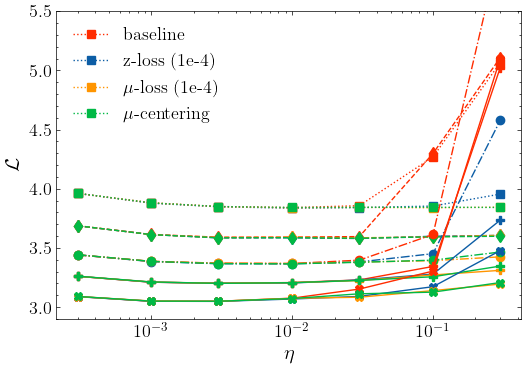

In [35]:
plot_wortsman(lrs, loss, 'test_loss', ns=NS, variants_lambdas=VARIANTS_LAMBDAS, ylim=(None, 5.5), legend=True, save_as=f'wortsman.test_loss.{FIGURE_FORMAT}')

> saved as figs/wortsman.logits_mean_mean.pdf


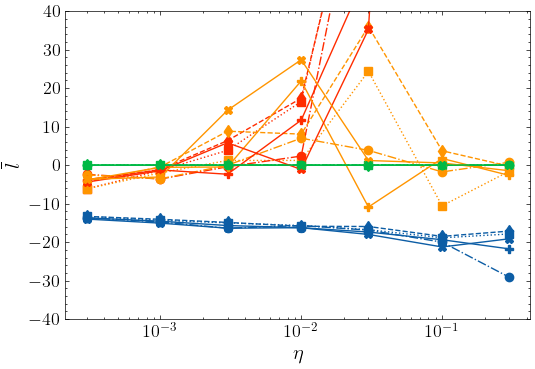

In [36]:
plot_wortsman(lrs, logits_mean_mean, 'logits_mean_mean', ns=NS, variants_lambdas=VARIANTS_LAMBDAS, ylim=(-40, 40), legend=False, save_as=f'wortsman.logits_mean_mean.{FIGURE_FORMAT}')

> saved as figs/wortsman.logits_mean_std.pdf


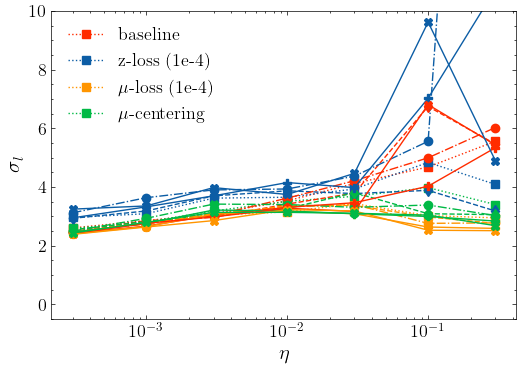

In [37]:
plot_wortsman(lrs, logits_mean_std, 'logits_mean_std', ns=NS, variants_lambdas=VARIANTS_LAMBDAS, ylim=(-0.5, 10), legend=True, save_as=f'wortsman.logits_mean_std.{FIGURE_FORMAT}')

> saved as figs/wortsman.logits_mean_absmax.pdf


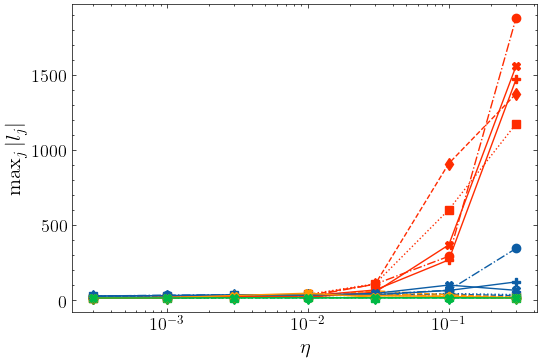

In [38]:
plot_wortsman(lrs, logits_mean_absmax, 'logits_mean_absmax', ns=NS, variants_lambdas=VARIANTS_LAMBDAS, legend=False, save_as=f'wortsman.logits_mean_absmax.{FIGURE_FORMAT}')

> saved as figs/wortsman.mu_norm.pdf


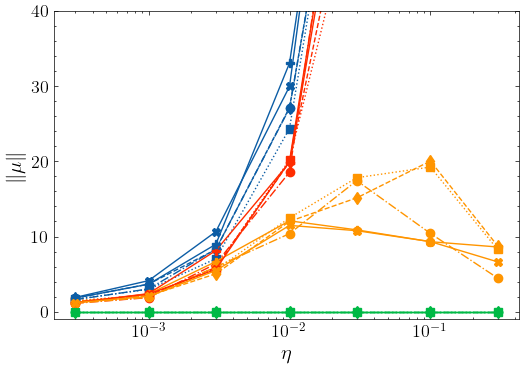

In [39]:
plot_wortsman(lrs, mu_norm, 'mu_norm', ns=NS, variants_lambdas=VARIANTS_LAMBDAS, ylim=(-1, 40), legend=False, save_as=f'wortsman.mu_norm.{FIGURE_FORMAT}')

### LR Sensitivity

In [40]:
# PARAMETERS
L0 = {
    '4': 10.83,
    '6': 10.83,
    '8': 10.83,
    'A': 10.83,
    'C': 10.85,
}

MODEL_SIZE = {
    '4': 16e6,
    '6': 29e6,
    '8': 57e6,
    'A': 109e6,
    'C': 221e6,
}

In [41]:
def get_lr_sensitivity(_loss, ns, variants_lambdas, verbose = False):
    lrs = {variant: {_lambda: {n: None for n in ns} for _lambda in variants_lambdas[variant]} for variant in variants_lambdas}
    best_loss = {variant: {_lambda: {n: None for n in ns} for _lambda in variants_lambdas[variant]} for variant in variants_lambdas}
    best_lr = {variant: {_lambda: {n: None for n in ns} for _lambda in variants_lambdas[variant]} for variant in variants_lambdas}
    for n in ns:
        for variant in variants_lambdas:
            for _lambda in variants_lambdas[variant]:
                if _lambda in _loss[n][variant]:
                    _losses = _loss[n][variant][_lambda]
                    best_loss[variant][_lambda][n] = float(np.min(_losses))
                    best_lr[variant][_lambda][n] = int(np.argmin(_losses))
                    _relative_loss = [float(np.min([elem, L0[n]])) - min(_losses) for elem in _losses]
                    _lrs = np.sum(_relative_loss) / float(len(_relative_loss) - 1)
                    if verbose:
                        print(n, variant, _relative_loss, _lrs)
                    lrs[variant][_lambda][n] = float(_lrs)
            
    return lrs, best_loss, best_lr

In [42]:
lr_sensitivity, best_loss, best_lr = get_lr_sensitivity(loss, ns=NS, variants_lambdas=VARIANTS_LAMBDAS)
lr_sensitivity

{'A': {0.0: {'4': 0.30616666666666653,
   '6': 0.3914999999999999,
   '8': 0.5079999999999997,
   'A': 0.3441666666666667,
   'C': 0.41216666666666685}},
 'Z': {0.0001: {'4': 0.05350000000000018,
   '6': 0.032666666666666545,
   '8': 0.23499999999999996,
   'A': 0.11800000000000004,
   'C': 0.10933333333333344}},
 'E': {0.0001: {'4': 0.030666666666666693,
   '6': 0.027333333333333504,
   '8': 0.030833333333333046,
   'A': 0.04600000000000004,
   'C': 0.056000000000000195}},
 'R': {0.0: {'4': 0.02833333333333325,
   '6': 0.029166666666666858,
   '8': 0.04066666666666655,
   'A': 0.050999999999999934,
   'C': 0.06050000000000022}}}

In [43]:
def plot_lr_sensitivity(_lr_sensitivity, ns, variants_lambdas, ylim = None, legend = False, alpha = False, save_as = ''):
    fix, ax = plt.subplots(1, 1, figsize=(6,3))
    ax = [ax, None]
    for variant in variants_lambdas:
        for _lambda in variants_lambdas[variant]:
            x = [MODEL_SIZE[n] for n in ns]
            if _lambda in _lr_sensitivity[variant]:
                y = [elem for elem in _lr_sensitivity[variant][_lambda].values() if elem is not None]
                x = x[:len(y)]
                ax[0].loglog(
                    x, 
                    y, 
                    marker='.', 
                    linestyle='--', 
                    color=CLR[variant], 
                    label=get_label(variant, _lambda),
                    alpha=ALPHA[_lambda] if alpha is True else 1,
                )
                for i, (n, elem_x, elem_y) in enumerate(zip(ns, x, y)):
                   ax[0].loglog(
                    elem_x, 
                    elem_y, 
                    marker=MARKER[n], 
                    linestyle='', 
                    color=CLR[variant], 
                    alpha=ALPHA[_lambda] if alpha is True else 1,
                ) 
            else:
                print(f'ERROR! could not plot lambda = {_lambda} for variant = {variant}.')
    if legend is True:
        ax[0].legend()
    
    ax[0].set_xlabel(r'$N$')
    ax[0].set_ylabel('LRS')

    if ylim is not None:
        ax[0].set_ylim(ylim)
    else:
        ylim = ax[0].get_ylim()
    
    if len(save_as):
        assert save_as.endswith('.pdf') or save_as.endswith('.png')
        fig_path = f'figs/{save_as}'
        plt.savefig(fig_path, format=save_as[-3:], bbox_inches='tight')
        print(f'> saved as {fig_path}')

    return ylim

> saved as figs/wortsman.lr_sensitivity.pdf


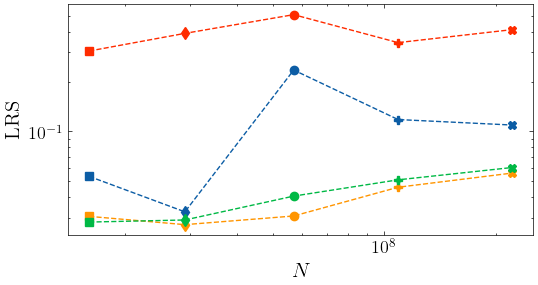

In [44]:
ylim_lr_sensitivity = plot_lr_sensitivity(lr_sensitivity, ns=NS, variants_lambdas=VARIANTS_LAMBDAS, legend=False, save_as=f'wortsman.lr_sensitivity.{FIGURE_FORMAT}')

# 3. Tex Table

In [45]:
lr_sensitivity

{'A': {0.0: {'4': 0.30616666666666653,
   '6': 0.3914999999999999,
   '8': 0.5079999999999997,
   'A': 0.3441666666666667,
   'C': 0.41216666666666685}},
 'Z': {0.0001: {'4': 0.05350000000000018,
   '6': 0.032666666666666545,
   '8': 0.23499999999999996,
   'A': 0.11800000000000004,
   'C': 0.10933333333333344}},
 'E': {0.0001: {'4': 0.030666666666666693,
   '6': 0.027333333333333504,
   '8': 0.030833333333333046,
   'A': 0.04600000000000004,
   'C': 0.056000000000000195}},
 'R': {0.0: {'4': 0.02833333333333325,
   '6': 0.029166666666666858,
   '8': 0.04066666666666655,
   'A': 0.050999999999999934,
   'C': 0.06050000000000022}}}

In [46]:
best_loss

{'A': {0.0: {'4': 3.841, '6': 3.591, '8': 3.369, 'A': 3.202, 'C': 3.05}},
 'Z': {0.0001: {'4': 3.836, '6': 3.58, '8': 3.366, 'A': 3.202, 'C': 3.049}},
 'E': {0.0001: {'4': 3.839, '6': 3.586, '8': 3.369, 'A': 3.202, 'C': 3.05}},
 'R': {0.0: {'4': 3.842, '6': 3.582, '8': 3.366, 'A': 3.201, 'C': 3.05}}}

In [47]:
best_lr

{'A': {0.0: {'4': 3, '6': 2, '8': 3, 'A': 2, 'C': 1}},
 'Z': {0.0001: {'4': 3, '6': 4, '8': 3, 'A': 2, 'C': 2}},
 'E': {0.0001: {'4': 3, '6': 4, '8': 3, 'A': 2, 'C': 2}},
 'R': {0.0: {'4': 3, '6': 4, '8': 3, 'A': 2, 'C': 2}}}

In [48]:
rel_delta_time

{'4': {'A': 0.0,
  'Z': 0.06358294664083182,
  'E': 0.003830527553123254,
  'R': 0.00586560982115911},
 '6': {'A': 0.0,
  'Z': 0.042512829673294526,
  'E': 0.0073717125706609455,
  'R': 0.004677853323062196},
 '8': {'A': 0.0,
  'Z': 0.02508416479633798,
  'E': 0.005560154218795151,
  'R': 0.004496566742961478},
 'A': {'A': 0.0,
  'Z': 0.015267655582645931,
  'E': 0.004082422480525942,
  'R': 0.003645032479421171},
 'C': {'A': 0.0,
  'Z': 0.007507584144465046,
  'E': 0.001535429816111308,
  'R': 0.0027780972783343553}}

In [49]:
rel_delta_time_reformatted = {variant: {n: rel_delta_time[n][variant] for n in NS} for variant in VARIANTS}
rel_delta_time_reformatted

{'A': {'4': 0.0, '6': 0.0, '8': 0.0, 'A': 0.0, 'C': 0.0},
 'Z': {'4': 0.06358294664083182,
  '6': 0.042512829673294526,
  '8': 0.02508416479633798,
  'A': 0.015267655582645931,
  'C': 0.007507584144465046},
 'E': {'4': 0.003830527553123254,
  '6': 0.0073717125706609455,
  '8': 0.005560154218795151,
  'A': 0.004082422480525942,
  'C': 0.001535429816111308},
 'R': {'4': 0.00586560982115911,
  '6': 0.004677853323062196,
  '8': 0.004496566742961478,
  'A': 0.003645032479421171,
  'C': 0.0027780972783343553}}

In [50]:
VARIANTS

['A', 'Z', 'E', 'R']

In [51]:
NS

['4', '6', '8', 'A', 'C']

In [52]:
LRs

['3', '10', '30', '100', '300', '1000', '3000']

In [53]:
MODEL_SIZE

{'4': 16000000.0,
 '6': 29000000.0,
 '8': 57000000.0,
 'A': 109000000.0,
 'C': 221000000.0}

In [54]:
def _format_overview(elem, elem_number, _which, _learning_rates):
    if elem is None:
        return ''
    else:
        if elem_number in [0]:
            model_size = MODEL_SIZE[elem]
            return f'{model_size:.0f}'
        elif _which == 'best_loss':
            return f'{elem:.2f}'
        elif _which == 'best_lr':
            learning_rate = int(_learning_rates[elem]) * 1e-4
            return f'{learning_rate:.0e}'.replace('0', '') 
        elif _which == 'lr_sensitivity':
            return f'{elem:.3f}'
        elif _which == 'time':
            return f'{100*elem:.1f}\%'
        else:
            raise ValueError(f'ERROR! _which = {_which} unknown.')
        

def get_overview_table(which, _metric, ns, variants_lambdas, learning_rates, save_as=''):
        
    data = {
        'ns': ns,
    }
    if isinstance(variants_lambdas, dict):
        for variant in variants_lambdas:
            if len(variants_lambdas[variant]) == 1:
                _lambda = variants_lambdas[variant][0]
                data[f'metric_{variant}'] = list(_metric[variant][_lambda].values())
            else:
                for _lambda in variants_lambdas[variant]:
                    data[f'metric_{variant}_{_lambda}'] = list(_metric[variant][_lambda].values())
    elif isinstance(variants_lambdas, list):
        for variant in variants_lambdas:
            data[f'metric_{variant}'] = list(_metric[variant].values())
    else:
        raise ValueError()

    if len(save_as):
        assert save_as.endswith('.tex')
        tex_path = f'tables/{save_as}'
        
        rows = []
        for row_number in range(len(data['ns'])):
            row = []
            for k, v in data.items():
                row.append(v[row_number])
            rows.append(row)
            
        with open(tex_path, 'w') as f:
            for i, row in enumerate(rows):
                row_formatted = [_format_overview(elem, elem_number, which, learning_rates) for elem_number, elem in enumerate(row)]
                f.write(f' & '.join(row_formatted))
                if i < len(rows) - 1:
                    f.write(' \\\\ \n')
                
        print(f'> saved as {tex_path}')
    return data

In [55]:
overview_best_loss = get_overview_table('best_loss', best_loss, ns=NS, learning_rates=LRs, variants_lambdas=VARIANTS_LAMBDAS, save_as='overview_best_loss.tex')
overview_best_loss

> saved as tables/overview_best_loss.tex


{'ns': ['4', '6', '8', 'A', 'C'],
 'metric_A': [3.841, 3.591, 3.369, 3.202, 3.05],
 'metric_Z': [3.836, 3.58, 3.366, 3.202, 3.049],
 'metric_E': [3.839, 3.586, 3.369, 3.202, 3.05],
 'metric_R': [3.842, 3.582, 3.366, 3.201, 3.05]}

In [56]:
overview_best_lr = get_overview_table('best_lr', best_lr, ns=NS, learning_rates=LRs, variants_lambdas=VARIANTS_LAMBDAS, save_as='overview_best_lr.tex')
overview_best_lr

> saved as tables/overview_best_lr.tex


{'ns': ['4', '6', '8', 'A', 'C'],
 'metric_A': [3, 2, 3, 2, 1],
 'metric_Z': [3, 4, 3, 2, 2],
 'metric_E': [3, 4, 3, 2, 2],
 'metric_R': [3, 4, 3, 2, 2]}

In [57]:
overview_lrs = get_overview_table('lr_sensitivity', lr_sensitivity, ns=NS, learning_rates=LRs, variants_lambdas=VARIANTS_LAMBDAS, save_as='overview_lr_sensitivity.tex')
overview_lrs

> saved as tables/overview_lr_sensitivity.tex


{'ns': ['4', '6', '8', 'A', 'C'],
 'metric_A': [0.30616666666666653,
  0.3914999999999999,
  0.5079999999999997,
  0.3441666666666667,
  0.41216666666666685],
 'metric_Z': [0.05350000000000018,
  0.032666666666666545,
  0.23499999999999996,
  0.11800000000000004,
  0.10933333333333344],
 'metric_E': [0.030666666666666693,
  0.027333333333333504,
  0.030833333333333046,
  0.04600000000000004,
  0.056000000000000195],
 'metric_R': [0.02833333333333325,
  0.029166666666666858,
  0.04066666666666655,
  0.050999999999999934,
  0.06050000000000022]}

In [58]:
overview_rel_delta_time = get_overview_table('time', rel_delta_time_reformatted, ns=NS, learning_rates=LRs, variants_lambdas=VARIANTS, save_as='overview_rel_delta_time.tex')
overview_rel_delta_time

> saved as tables/overview_rel_delta_time.tex


{'ns': ['4', '6', '8', 'A', 'C'],
 'metric_A': [0.0, 0.0, 0.0, 0.0, 0.0],
 'metric_Z': [0.06358294664083182,
  0.042512829673294526,
  0.02508416479633798,
  0.015267655582645931,
  0.007507584144465046],
 'metric_E': [0.003830527553123254,
  0.0073717125706609455,
  0.005560154218795151,
  0.004082422480525942,
  0.001535429816111308],
 'metric_R': [0.00586560982115911,
  0.004677853323062196,
  0.004496566742961478,
  0.003645032479421171,
  0.0027780972783343553]}

# 4. Hyperparameter Sensitivity

In [59]:
# PARAMETERS
VARIANTS_E = {
    'E': [1e-07, 1e-04, 1e-01, 1e+02],
}

VARIANTS_Z = {
    'Z': [1e-07, 0.0001, 0.1, 100],
}

### VARIANT E

> saved as figs/wortsman.test_loss.E.pdf


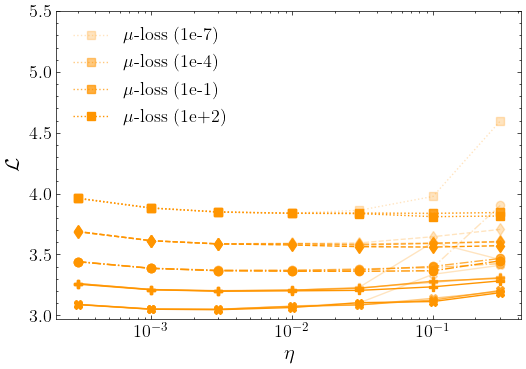

In [60]:
plot_wortsman(lrs, loss, 'test_loss', ns=NS, variants_lambdas=VARIANTS_E, ylim=(None, 5.5), legend=True, alpha=True, save_as=f'wortsman.test_loss.E.{FIGURE_FORMAT}')

In [61]:
lr_sensitivity_E, best_loss_E, best_lr_E = get_lr_sensitivity(loss, ns=NS, variants_lambdas=VARIANTS_E)
lr_sensitivity_E

{'E': {1e-07: {'4': 0.18150000000000013,
   '6': 0.05183333333333332,
   '8': 0.11016666666666652,
   'A': 0.12500000000000014,
   'C': 0.12949999999999995},
  0.0001: {'4': 0.030666666666666693,
   '6': 0.027333333333333504,
   '8': 0.030833333333333046,
   'A': 0.04600000000000004,
   'C': 0.056000000000000195},
  0.1: {'4': 0.031499999999999785,
   '6': 0.03350000000000016,
   '8': 0.03816666666666683,
   'A': 0.04783333333333317,
   'C': 0.056000000000000126},
  100.0: {'4': 0.053666666666666675,
   '6': 0.03966666666666674,
   '8': 0.03266666666666662,
   'A': 0.03350000000000001,
   'C': 0.05483333333333351}}}

In [62]:
overview_best_loss_E = get_overview_table('best_loss', best_loss_E, ns=NS, learning_rates=LRs, variants_lambdas=VARIANTS_E, save_as='overview_best_loss.E.tex')
overview_best_loss_E

> saved as tables/overview_best_loss.E.tex


{'ns': ['4', '6', '8', 'A', 'C'],
 'metric_E_1e-07': [3.84, 3.588, 3.369, 3.203, 3.048],
 'metric_E_0.0001': [3.839, 3.586, 3.369, 3.202, 3.05],
 'metric_E_0.1': [3.837, 3.578, 3.368, 3.2, 3.049],
 'metric_E_100.0': [3.811, 3.561, 3.362, 3.198, 3.046]}

In [63]:
overview_best_lr_E = get_overview_table('best_lr', best_lr_E, ns=NS, learning_rates=LRs, variants_lambdas=VARIANTS_E, save_as='overview_best_lr.E.tex')
overview_best_lr_E

> saved as tables/overview_best_lr.E.tex


{'ns': ['4', '6', '8', 'A', 'C'],
 'metric_E_1e-07': [3, 2, 2, 2, 2],
 'metric_E_0.0001': [3, 4, 3, 2, 2],
 'metric_E_0.1': [5, 4, 2, 2, 2],
 'metric_E_100.0': [5, 5, 3, 2, 2]}

In [64]:
overview_lrs_E = get_overview_table('lr_sensitivity', lr_sensitivity_E, ns=NS, learning_rates=LRs, variants_lambdas=VARIANTS_E, save_as='overview_lr_sensitivity.E.tex')
overview_lrs_E

> saved as tables/overview_lr_sensitivity.E.tex


{'ns': ['4', '6', '8', 'A', 'C'],
 'metric_E_1e-07': [0.18150000000000013,
  0.05183333333333332,
  0.11016666666666652,
  0.12500000000000014,
  0.12949999999999995],
 'metric_E_0.0001': [0.030666666666666693,
  0.027333333333333504,
  0.030833333333333046,
  0.04600000000000004,
  0.056000000000000195],
 'metric_E_0.1': [0.031499999999999785,
  0.03350000000000016,
  0.03816666666666683,
  0.04783333333333317,
  0.056000000000000126],
 'metric_E_100.0': [0.053666666666666675,
  0.03966666666666674,
  0.03266666666666662,
  0.03350000000000001,
  0.05483333333333351]}

> saved as figs/wortsman.lr_sensitivity.E.pdf


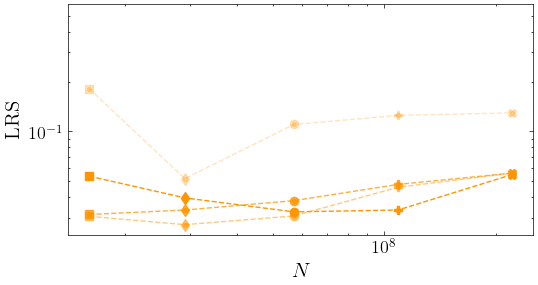

In [65]:
_ = plot_lr_sensitivity(lr_sensitivity_E, ns=NS, variants_lambdas=VARIANTS_E, ylim=ylim_lr_sensitivity, legend=False, alpha=True, save_as=f'wortsman.lr_sensitivity.E.{FIGURE_FORMAT}')

### VARIANT Z

> saved as figs/wortsman.test_loss.Z.pdf


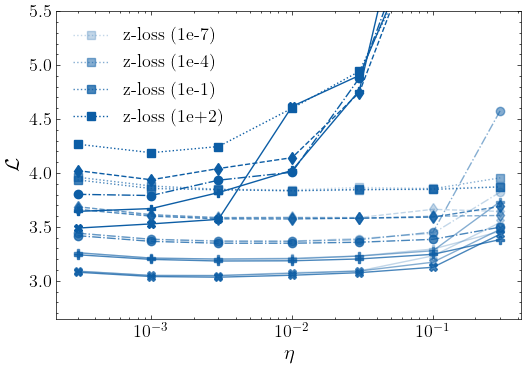

In [66]:
plot_wortsman(lrs, loss, 'test_loss', ns=NS, variants_lambdas=VARIANTS_Z, ylim=(None, 5.5), legend=True, alpha=True, save_as=f'wortsman.test_loss.Z.{FIGURE_FORMAT}')

In [67]:
lr_sensitivity_Z, best_loss_Z, best_lr_Z = get_lr_sensitivity(loss, ns=NS, variants_lambdas=VARIANTS_Z)
lr_sensitivity_Z

{'Z': {1e-07: {'4': 0.03716666666666679,
   '6': 0.04399999999999982,
   '8': 0.10666666666666647,
   'A': 0.07583333333333335,
   'C': 0.13133333333333344},
  0.0001: {'4': 0.05350000000000018,
   '6': 0.032666666666666545,
   '8': 0.23499999999999996,
   'A': 0.11800000000000004,
   'C': 0.10933333333333344},
  0.1: {'4': 0.03216666666666668,
   '6': 0.04266666666666685,
   '8': 0.046833333333333206,
   'A': 0.059166666666666444,
   'C': 0.10050000000000019},
  100: {'4': 1.1560000000000004,
   '6': 1.7798333333333336,
   '8': 1.3921666666666666,
   'A': 2.149833333333333,
   'C': 2.166166666666667}}}

In [68]:
overview_best_loss_Z = get_overview_table('best_loss', best_loss_Z, ns=NS, learning_rates=LRs, variants_lambdas=VARIANTS_Z, save_as='overview_best_loss.Z.tex')
overview_best_loss_Z

> saved as tables/overview_best_loss.Z.tex


{'ns': ['4', '6', '8', 'A', 'C'],
 'metric_Z_1e-07': [3.844, 3.587, 3.369, 3.202, 3.049],
 'metric_Z_0.0001': [3.836, 3.58, 3.366, 3.202, 3.049],
 'metric_Z_0.1': [3.835, 3.574, 3.349, 3.184, 3.034],
 'metric_Z_100': [4.188, 3.937, 3.791, 3.644, 3.489]}

In [69]:
overview_best_lr_Z = get_overview_table('best_lr', best_lr_Z, ns=NS, learning_rates=LRs, variants_lambdas=VARIANTS_Z, save_as='overview_best_lr.Z.tex')
overview_best_lr_Z

> saved as tables/overview_best_lr.Z.tex


{'ns': ['4', '6', '8', 'A', 'C'],
 'metric_Z_1e-07': [3, 4, 3, 2, 2],
 'metric_Z_0.0001': [3, 4, 3, 2, 2],
 'metric_Z_0.1': [3, 3, 2, 2, 2],
 'metric_Z_100': [1, 1, 1, 0, 0]}

In [70]:
overview_lrs_Z = get_overview_table('lr_sensitivity', lr_sensitivity_Z, ns=NS, learning_rates=LRs, variants_lambdas=VARIANTS_Z, save_as='overview_lr_sensitivity.Z.tex')
overview_lrs_Z

> saved as tables/overview_lr_sensitivity.Z.tex


{'ns': ['4', '6', '8', 'A', 'C'],
 'metric_Z_1e-07': [0.03716666666666679,
  0.04399999999999982,
  0.10666666666666647,
  0.07583333333333335,
  0.13133333333333344],
 'metric_Z_0.0001': [0.05350000000000018,
  0.032666666666666545,
  0.23499999999999996,
  0.11800000000000004,
  0.10933333333333344],
 'metric_Z_0.1': [0.03216666666666668,
  0.04266666666666685,
  0.046833333333333206,
  0.059166666666666444,
  0.10050000000000019],
 'metric_Z_100': [1.1560000000000004,
  1.7798333333333336,
  1.3921666666666666,
  2.149833333333333,
  2.166166666666667]}

> saved as figs/wortsman.lr_sensitivity.Z.pdf


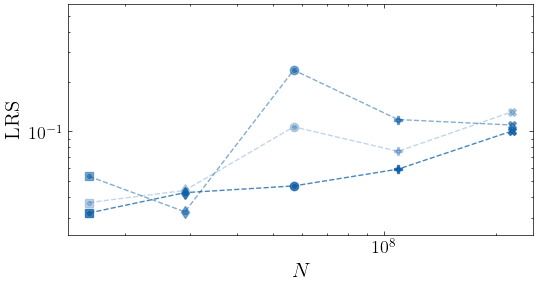

In [71]:
_ = plot_lr_sensitivity(lr_sensitivity_Z, ns=NS, variants_lambdas=VARIANTS_Z, ylim=ylim_lr_sensitivity, legend=False, alpha=True, save_as=f'wortsman.lr_sensitivity.Z.{FIGURE_FORMAT}')